In [16]:
# 1. Import Libraries  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
# 2. Load Dataset
df = pd.read_csv("phishing urldataset.csv")  # Make sure the file is in the same directory


In [18]:
# 3. Data Preprocessing  
X = df.drop("Result", axis=1) #All the columns (features) used to make predictions.
y = df["Result"] #The answer column (Result: -1 means phishing, 1 means safe).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# 4. Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
# 5. Evaluation  
y_pred = model.predict(X_test) #Uses the trained model to predict whether the test URLs are phishing or safe, and stores the results in y_pred.


In [21]:
# 6. Feature Importance
print("Accuracy:", accuracy_score(y_test, y_pred)) #% of correct predictions.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) #Shows how many phishing and safe URLs were correctly or wrongly predicted.
print("Classification Report:\n", classification_report(y_test, y_pred)) #Gives precision, recall, and F1-score to help judge how good the model is.


Accuracy: 0.9669832654907282
Confusion Matrix:
 [[ 909   47]
 [  26 1229]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



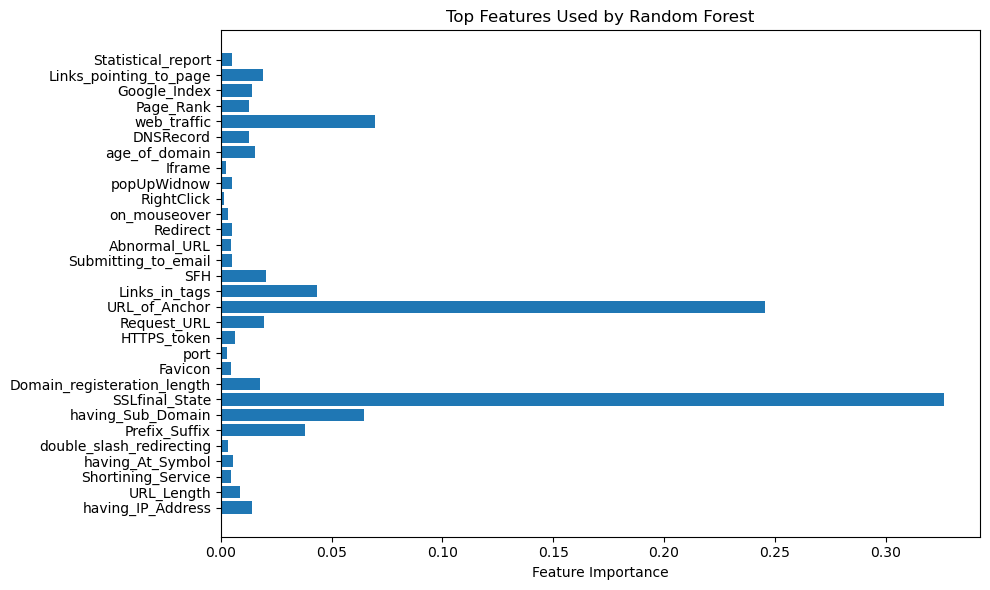

In [22]:
# Visualize which features (columns) in your dataset were most important for the Random Forest model when making its predictions.
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Top Features Used by Random Forest")
plt.tight_layout()
plt.show()


In [23]:
import re
import socket
from urllib.parse import urlparse

def extract_features(url):
    features = []

    # 1. Having IP Address
    try:
        ip = socket.gethostbyname(urlparse(url).netloc)
        features.append(-1)
    except:
        features.append(1)

    # 2. URL Length
    features.append(-1 if len(url) < 54 else (0 if len(url) <= 75 else 1))

    # 3. Shortening service
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd"
    features.append(-1 if re.search(shortening_services, url) else 1)

    # 4. Having '@' Symbol
    features.append(-1 if "@" in url else 1)

    # 5. Double slash redirecting
    features.append(-1 if url.rfind("//") > 6 else 1)

    # 6. Prefix/Suffix '-'
    features.append(-1 if '-' in urlparse(url).netloc else 1)

    # 7. Sub domain
    dots = urlparse(url).netloc.split('.')
    features.append(1 if len(dots) <= 2 else (-1 if len(dots) > 3 else 0))

    # 8. SSL final state (simplified)
    features.append(1 if url.startswith("https") else -1)

    # 22 dummy features (can be replaced with logic later)
    for _ in range(22):
        features.append(0)

    return features


In [24]:
import pickle

# Save the trained model as a binary file
with open("phishing_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [25]:
extract_features("https://example.com")

[-1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]